#### This notebook is an analysis to identify which category is popular , i.e. got most shares

In [1]:
# imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
data = pd.read_csv('../OnlineNewsPopularity/OnlineNewsPopularity.csv', delimiter=',\s*', engine='python')

In [17]:
print(data['shares'].describe())

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


In [7]:
# Function to determine the category
def get_category(row):
    if row['data_channel_is_lifestyle'] == 1:
        return 'Lifestyle'
    elif row['data_channel_is_entertainment'] == 1:
        return 'Entertainment'
    elif row['data_channel_is_bus'] == 1:
        return 'Business'
    elif row['data_channel_is_socmed'] == 1:
        return 'Social Media'
    elif row['data_channel_is_tech'] == 1:
        return 'Technology'
    elif row['data_channel_is_world'] == 1:
        return 'World'
    else:
        return 'Other'


# Apply the function to each row to create the Category column
data['Category'] = data.apply(get_category, axis=1)

# Filter out rows that do not belong to any category
filtered_data = data[data['Category'] != 'Other']

In [8]:
data['Category'].value_counts()

World            8427
Technology       7346
Entertainment    7057
Business         6258
Other            6134
Social Media     2323
Lifestyle        2099
Name: Category, dtype: int64

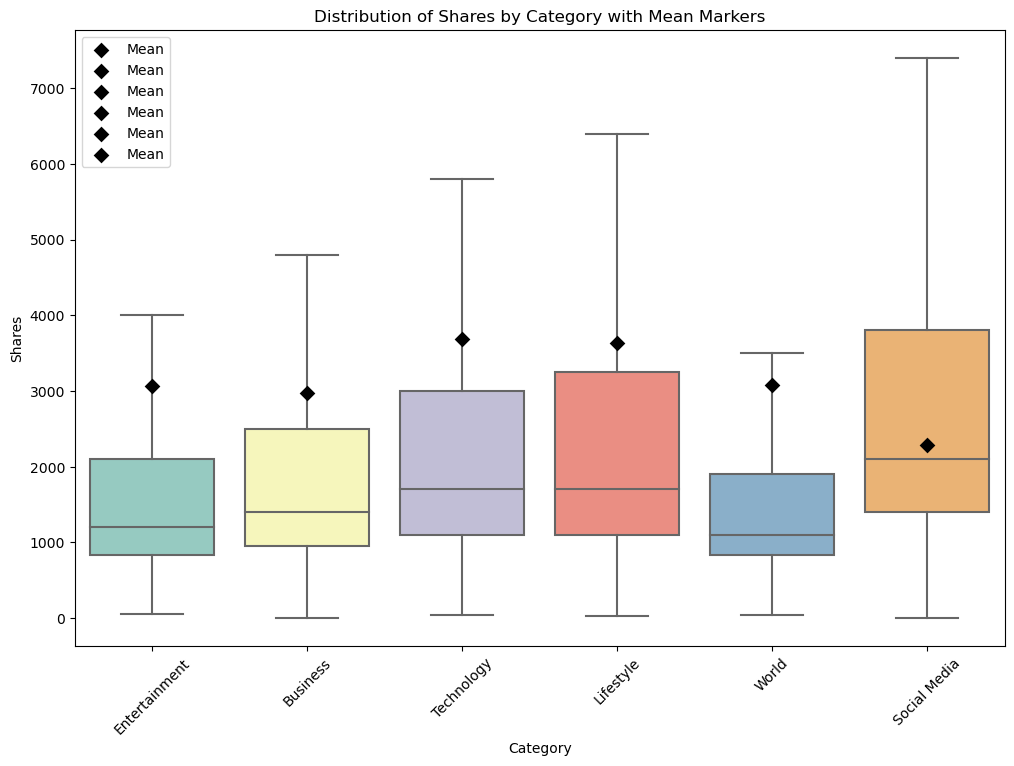

In [9]:

# Boxplot for the distribution of shares by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='shares', data=filtered_data, showfliers=False, palette="Set3")  # Exclude outliers for clarity

# Calculate mean shares for each category and overlay as points to take outliers into account as well
means = filtered_data.groupby('Category')['shares'].mean().reset_index()
mean_points = sns.stripplot(x='Category', y='shares', data=means, color='black', size=8, marker="D", label="Mean")

plt.title('Distribution of Shares by Category with Mean Markers')
plt.ylabel('Shares')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend()
plt.show()

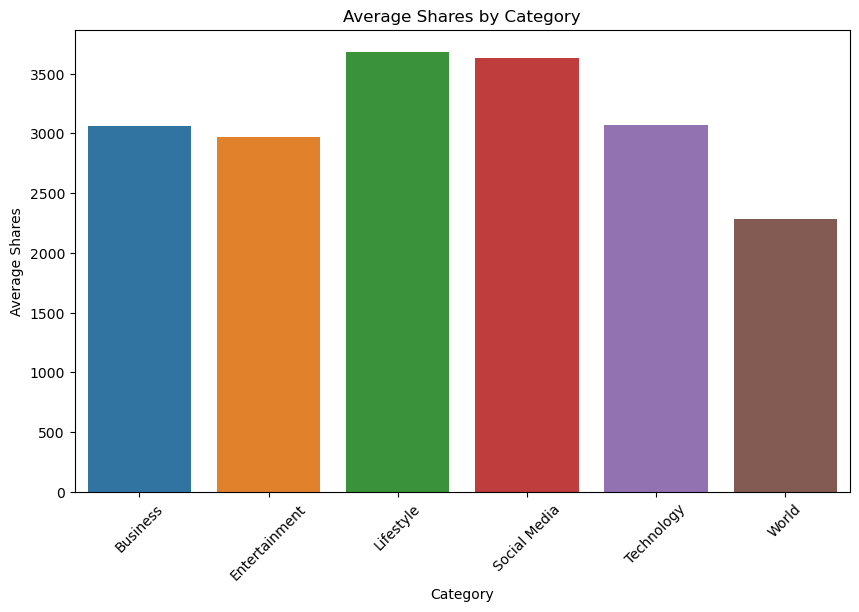

In [10]:
# Bar chart for average shares by category
average_shares_by_category = filtered_data.groupby('Category')['shares'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='shares', data=average_shares_by_category)
plt.title('Average Shares by Category')
plt.ylabel('Average Shares')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

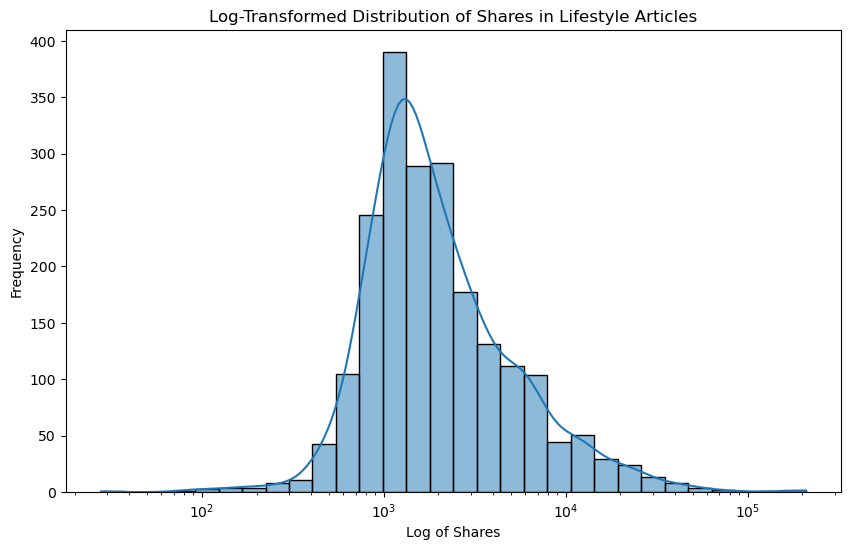

In [11]:
plt.figure(figsize=(10, 6))
# Apply log transformation by setting `log_scale` in seaborn's histplot
sns.histplot(data=filtered_data[filtered_data['Category'] == 'Lifestyle']['shares'], bins=30, kde=True, log_scale=True)
plt.title('Log-Transformed Distribution of Shares in Lifestyle Articles')
plt.xlabel('Log of Shares')
plt.ylabel('Frequency')
plt.show()

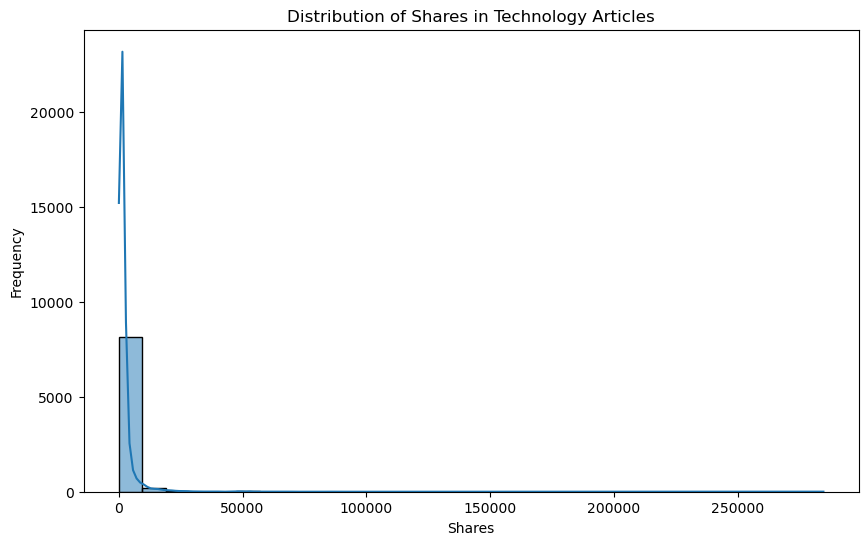

In [12]:
# Histogram for the number of shares in a specific category, e.g., Technology
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data[filtered_data['Category'] == 'World']['shares'], bins=30, kde=True)
plt.title('Distribution of Shares in Technology Articles')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Perform ANOVA test
f_value, p_value = stats.f_oneway(
    filtered_data[filtered_data['Category'] == 'Lifestyle']['shares'],
    filtered_data[filtered_data['Category'] == 'Entertainment']['shares'],
    filtered_data[filtered_data['Category'] == 'Business']['shares'],
    filtered_data[filtered_data['Category'] == 'Social Media']['shares'],
    filtered_data[filtered_data['Category'] == 'Technology']['shares'],
    filtered_data[filtered_data['Category'] == 'World']['shares']
)

print('F-value:', f_value)
print('P-value:', p_value)


F-value: 13.562516145486166
P-value: 3.0140418440328297e-13


In [16]:
# Correlation matrix for all numeric features
correlation_matrix = data.corr()
print(correlation_matrix['shares'].sort_values(ascending=False).head(10))

C:\Users\Swarali\AppData\Local\Temp\ipykernel_26440\1428648528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


shares                        1.000000
kw_avg_avg                    0.110413
LDA_03                        0.083771
kw_max_avg                    0.064306
self_reference_avg_sharess    0.057789
self_reference_min_shares     0.055958
self_reference_max_shares     0.047115
num_hrefs                     0.045404
kw_avg_max                    0.044686
kw_min_avg                    0.039551
Name: shares, dtype: float64
